In [10]:
# !pip install numpy pandas tensorflow matplotlib opencv-python scipy


In [11]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [12]:
# !pip install 

In [13]:
from tensorflow import keras
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import cv2
from matplotlib import pyplot as plt

In [14]:
!pwd
path = "/home/abirhasanmubin/biplab/ariake/crack_detection/"

/home/abirhasanmubin/biplab/ariake/crack_detection


In [15]:
train=ImageDataGenerator(rescale=1/255,validation_split=0.05)

In [16]:
train_dataset=train.flow_from_directory(path +'surface_crack_detection',
                                       target_size=(150,150),
                                       batch_size=32,
                                       class_mode='binary',
                                       subset='training',           
                                       )
val_dataset=train.flow_from_directory(path +'surface_crack_detection',
                                       target_size=(150,150),
                                      batch_size=32,
                                       class_mode='binary',
                                       subset='validation',           
                                       )

Found 38000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [17]:
train_dataset.class_indices

{'Negative': 0, 'Positive': 1}

In [18]:
model=Sequential()
model.add(Conv2D(256,(1,1),input_shape=(128,128,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(1,1),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(1,1),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(1,1),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(Dense(32,activation='relu',kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 256)     1024      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 256)       65792     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 32, 32, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 256)       65792     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 256)      

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history=model.fit(train_dataset,epochs=1,validation_data=val_dataset,batch_size=128)

2023-08-05 13:02:18.187238: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 737280000 exceeds 10% of free system memory.
2023-08-05 13:02:18.868290: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 737280000 exceeds 10% of free system memory.


   1/1188 [..............................] - ETA: 40:51 - loss: 5.2273 - accuracy: 0.6250

2023-08-05 13:02:19.330842: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 737280000 exceeds 10% of free system memory.
2023-08-05 13:02:19.981466: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 737280000 exceeds 10% of free system memory.


   2/1188 [..............................] - ETA: 21:45 - loss: 5.5001 - accuracy: 0.5781

2023-08-05 13:02:20.432136: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 737280000 exceeds 10% of free system memory.


1188/1188 [==============================] - 1322s 1s/step - loss: 0.8573 - accuracy: 0.8918 - val_loss: 0.1466 - val_accuracy: 0.9870


## checking with new image

In [21]:
# img=image.load_img(path+'surface_crack_detection/Positive/00005.jpg',target_size=(128,128))
img=image.load_img(path+'test_data/crack.jpg',target_size=(128,128))

In [22]:
!pwd

/home/abirhasanmubin/biplab/ariake/crack_detection


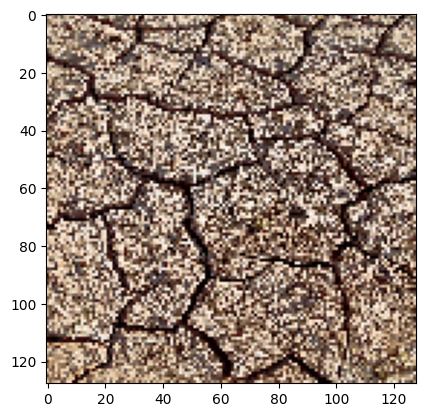

In [23]:
plt.imshow(img)

In [24]:
img1=image.img_to_array(img)
img1=img1/255

In [25]:
img1=np.expand_dims(img1,[0])
print(img1.shape)

(1, 128, 128, 3)


In [26]:
pred=model.predict(img1)
if(pred[0]>=0.5):
    print("Crack Detected")
else:
    print("No Crack Detected")

1/1 [==============================] - 0s 83ms/step
Crack Detected


In [27]:
pred

array([[0.61856246]], dtype=float32)

In [28]:
!pip install joblib


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [29]:
import joblib


In [30]:
# Assuming you have trained your model and stored it in the variable 'model'
model_filename = 'model.pkl'
joblib.dump(model, model_filename)


['model.pkl']

In [31]:
# Load the saved model from the file
loaded_model = joblib.load(model_filename)

# Now you can use the 'loaded_model' just like the original model


In [32]:
print(loaded_model)